Sentiment Analysis using **Bag of Words Vectorization-Based Models**

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

data = pd.read_csv('m_sampled_10k.csv')
data.head()

,Unnamed: 0,Sentence,Sentiment
0,167039,"So I am in your exact same situation, I have $...",positive
1,113878,"No, I very frequently do market orders for sin...",positive
2,146825,"To make sure I understand, people want stocks ...",positive
3,103017,is that a big green candle or are you just hap...,positive
4,121447,Any hope for my TSLA 1/22 1100c which are down...,positive


In [93]:
data.Sentiment.value_counts()

positive    10000
negative    10000
neutral     10000
Name: Sentiment, dtype: int64

In [94]:
data = data.sample(frac = 1, random_state = 1)

In [95]:
data.head()

,Unnamed: 0,Sentence,Sentiment
10747,28997,Just sold my QYLD and will buy more TSLA tomor...,negative
12573,76069,Cathy bought $tsla today,negative
29676,29946,"UPST, PLUG, CRWD, ETSY, RH, LULU, SPOT, AMD, T...",neutral
8856,175045,Dream scenario: TSLA offers all stock deal for...,positive
21098,32673,👨 GIMME FOO GIMME FAH GIMME ZABAHZABAHZHAA. I'...,neutral


In [96]:
data.Sentiment.value_counts()

negative    10000
neutral     10000
positive    10000
Name: Sentiment, dtype: int64

In [97]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Sentence'])

In [98]:
#Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.20, random_state = 6, stratify = data['Sentiment']) # VS stratify = data['Sentiment']

In [99]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [100]:
#Caluclating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.5495


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


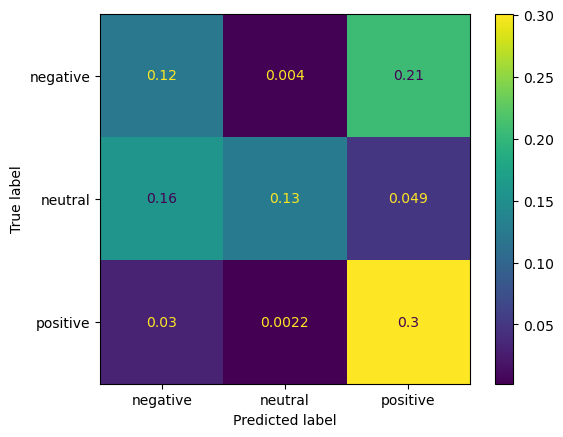

In [101]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(MNB, X_test, Y_test, normalize='all')

In [102]:
#For Model Testing
test_data = pd.read_csv('sampled2.csv')

In [103]:
test_data.Sentiment.value_counts()

positive    52
negative    35
neutral     12
Name: Sentiment, dtype: int64

In [104]:
test_label = test_data['Sentiment'].tolist()
test_sentence = test_data['Sentence'].tolist()

test_counts = cv.transform(test_data['Sentence'])

test_predicted = MNB.predict(test_counts)
score = metrics.accuracy_score(test_predicted, test_label)

print("Accuracy Score: ", score)

Accuracy Score:  0.6363636363636364
